In [1]:
# imports
import math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU, Reshape, Conv2DTranspose
from tensorflow.keras.initializers import RandomNormal

from gan import build_composite

In [2]:
X_color = np.load('datasets/train_128_color_filt.npy')
X_test_color = np.load('datasets/test_128_color_filt.npy')

In [3]:
def generate_latent(latent_size, n):
    return np.random.randn(n, latent_size)

In [4]:
def generate_fake_imgs(model, latent_size, n):
    latent_samples = generate_latent(latent_size, n)
    return model.predict(latent_samples)

In [5]:
def show_imgs(X, is_fake=False, save=''):
    for i in range(len(X)):
        plt.subplot(math.ceil(len(X) / 10), min(len(X), 10), 1 + i)
        plt.axis('off')
        plt.imshow(X[i] if not is_fake else (X[i]+1)/2)
        if save != '':
            plt.savefig(save)

In [6]:
def train_disc(disc, gen, X, n):
    X_real = X[np.random.randint(len(X), size=n//2)]
    X_fake = generate_fake_imgs(gen, 100, n//2)
    disc_loss_fake = disc.train_on_batch(X_fake, np.zeros((n//2, 1)))
    disc_loss_real = disc.train_on_batch(X_real, np.ones((n//2, 1)))
    
    return disc_loss_fake, disc_loss_real

In [7]:
def train_gen(gen, latent_dim, n):
    latent_fake = generate_latent(latent_dim, n)
    return gen.train_on_batch(latent_fake, np.ones(len(latent_fake)))

In [8]:
def train_gan(gen, disc, latent_dim, X, n_epochs=200, n_batch=128):
    for i in range(n_epochs):
		# train discriminator on real+fake samples
        
        
        
        disc_loss_fake, disc_loss_real = train_disc(disc, gen, X, n_batch)
        
        # update generator by training generator to help discriminator output that fake images are real
        # generate some fake latent vectors
        gan_loss = train_gen(gen, 100, n_batch)
        
        print('epoch {}: disc fake loss, acc: {}, disc real loss, acc: {}, gen loss: {}'.format(i, disc_loss_fake, disc_loss_real, gan_loss))
        
        if i % 10 == 9:
            # plot some fake images
            imgs = gen.predict(generate_latent(latent_dim, 10))
            show_imgs(imgs, is_fake=True, save=str(i)+'.png')
            

In [9]:
gen, disc = build_composite(100)

C:\Users\nglaz\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [10]:
disc.load_weights('weights/GAN/disc.h5')
gen.load_weights('weights/GAN/gen.h5')

In [16]:
for _ in range(10):
        print(train_disc(disc, gen, X_color, 128))

([0.4333295226097107, 0.890625], [0.43697673082351685, 0.796875])
([0.33103853464126587, 0.984375], [0.39137569069862366, 0.859375])
([0.34013989567756653, 1.0], [0.3515905737876892, 0.8125])
([0.27447283267974854, 1.0], [0.28427910804748535, 0.953125])
([0.25550323724746704, 1.0], [0.23842903971672058, 0.96875])
([0.22077825665473938, 1.0], [0.15180230140686035, 1.0])
([0.1785556823015213, 1.0], [0.20470836758613586, 0.96875])
([0.1356450617313385, 1.0], [0.12207198143005371, 1.0])
([0.11555905640125275, 1.0], [0.11594940721988678, 0.984375])
([0.09397788345813751, 1.0], [0.0918530821800232, 1.0])


In [ ]:
for _ in range(10):
        print(train_gen(gen, 100, 128))

In [123]:
disc.save_weights('weights/GAN/disc.h5')
gen.save_weights('weights/GAN/gen.h5')

epoch 0: disc fake loss, acc: [0.09605951607227325, 1.0], disc real loss, acc: [0.09838089346885681, 1.0], gen loss: 2.619257926940918
epoch 1: disc fake loss, acc: [0.21339073777198792, 1.0], disc real loss, acc: [0.16033509373664856, 1.0], gen loss: 2.499807834625244
epoch 2: disc fake loss, acc: [0.19498878717422485, 1.0], disc real loss, acc: [0.1866251826286316, 0.953125], gen loss: 2.351339817047119
epoch 3: disc fake loss, acc: [0.24573612213134766, 0.984375], disc real loss, acc: [0.2865111231803894, 0.9375], gen loss: 1.7334623336791992
epoch 4: disc fake loss, acc: [0.4351426362991333, 0.953125], disc real loss, acc: [0.383716881275177, 0.828125], gen loss: 1.9999542236328125
epoch 5: disc fake loss, acc: [0.31086957454681396, 1.0], disc real loss, acc: [0.4396076798439026, 0.84375], gen loss: 1.3237953186035156
epoch 6: disc fake loss, acc: [0.537002682685852, 0.796875], disc real loss, acc: [0.6756532192230225, 0.578125], gen loss: 0.963503360748291
epoch 7: disc fake loss,

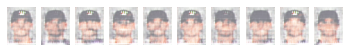

In [17]:
train_gan(gen, disc, 100, X_color, n_epochs=20, n_batch=128)

In [14]:
def demo(gen, disc, X):
    show_imgs(X)
    print('preds on real:', disc.predict(X))
    plt.figure()
    fake = generate_fake_imgs(gen, 100, len(X))

    show_imgs(fake, is_fake=True)
    print('preds on fake:', disc.predict(fake))
    

preds on real: [[0.848442 ]
 [0.9419187]
 [0.9431007]]
preds on fake: [[0.37341142]
 [0.26789358]
 [0.31300062]]


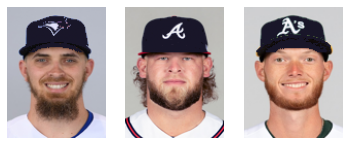

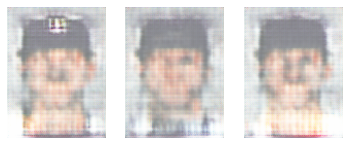

In [15]:
demo(gen, disc, X_color[:3])

preds on real: [[0.65596026]
 [0.71191466]
 [0.63161254]]
preds on fake: [[0.5996595 ]
 [0.50050724]
 [0.5340481 ]]


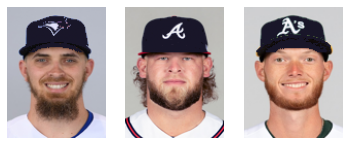

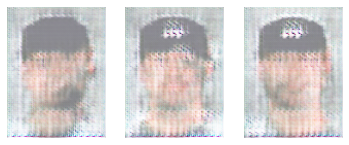

In [45]:
demo(gen, disc, X_color[:3])